# **Project Title : Household Electric Power Consumption**

##**Problem Statement:**

**The "Indian Household Electricity Consumption Dataset" presents a rich source of information for predicting monthly electricity bills in Indian households. The dataset encapsulates details on the monthly operational hours of various household appliances like fans, air conditioners, refrigerators, televisions, monitors, and motor pumps. Additionally, demographic factors such as the city of residence and the corresponding electricity distribution company are included. The primary objective of this dataset is to develop predictive models for estimating the monthly electricity bills of households based on their appliance usage patterns and pertinent demographic information. This predictive modeling task holds significant relevance for energy management strategies, allowing utilities and consumers to optimize electricity consumption. Moreover, it offers valuable insights into consumer behavior and preferences, contributing to a deeper understanding of electricity consumption patterns across diverse households in different cities served by distinct distribution companies.**

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

####**Import data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project/models/All model and dataset/Indian Household Electricity Consumption/electricity_bill_dataset.csv')

In [ ]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [ ]:
df['City'].value_counts()

Hyderabad      2914
Navi Mumbai    2914
Ratnagiri      2892
Faridabad      2891
Gurgaon        2878
Ahmedabad      2868
New Delhi      2848
Mumbai         2846
Chennai        2834
Dahej          2821
Nagpur         2816
Noida          2793
Pune           2788
Shimla         2780
Kolkata        2740
Vadodara       2722
Name: City, dtype: int64

In [ ]:
df['Company'].value_counts()

Ringfeder Power Transmission India Pvt. Ltd.                          1486
JSW Energy Ltd.                                                       1477
Guj Ind Power                                                         1476
SJVN Ltd.                                                             1471
Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.    1470
NTPC Pvt. Ltd.                                                        1466
Optibelt Power Transmission India Private Limited                     1463
Kalpataru Power                                                       1456
GE T&D India Limited                                                  1453
KEC International                                                     1442
Reliance Power                                                        1441
Orient Green                                                          1427
Torrent Power Ltd.                                                    1426
L&T Transmission & Distri

####**Shape of the dataset**

In [ ]:
df.shape

(45345, 12)

####**Null values**

In [ ]:
df.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

####**Duplicates**

In [ ]:
duplicates =len(df[df.duplicated()])
print(duplicates)

0


In [ ]:
!pip install missingno

<Axes: >

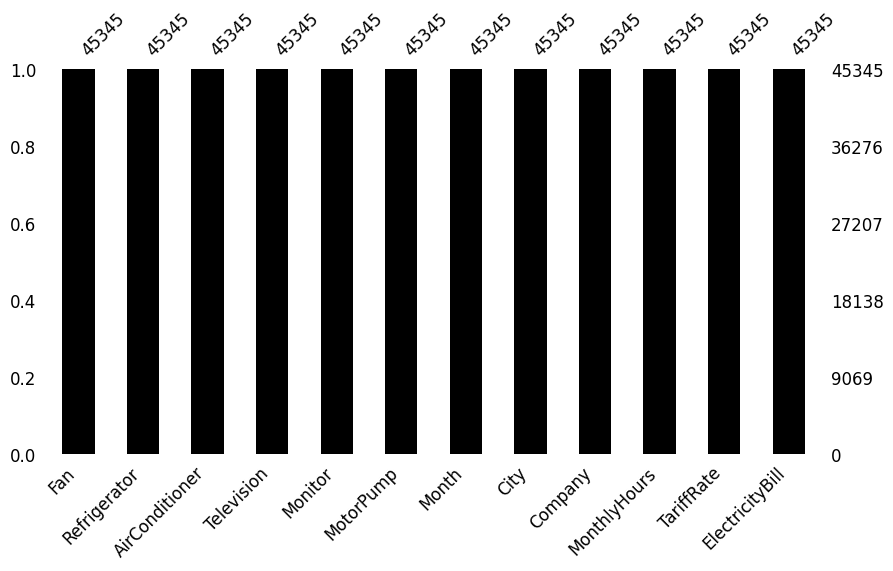

In [ ]:
plt.figure(figsize=(5,3))
msno.bar(df,color = 'black',figsize=(10,5), fontsize=12)

*   **There are no missing value**

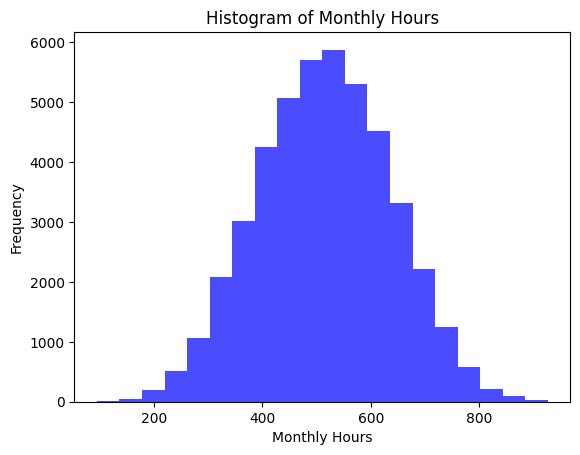

In [ ]:
#plot MonthlyHours
plt.hist(df['MonthlyHours'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Monthly Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Hours')
plt.show()

*   **Monthly Hours is normally distributed**

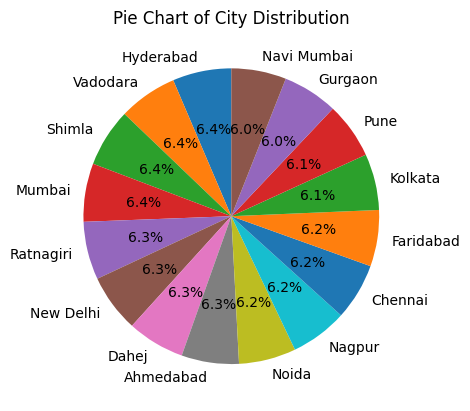

In [ ]:
plt.pie(df['City'].value_counts(), labels=df['City'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of City Distribution')
plt.show()

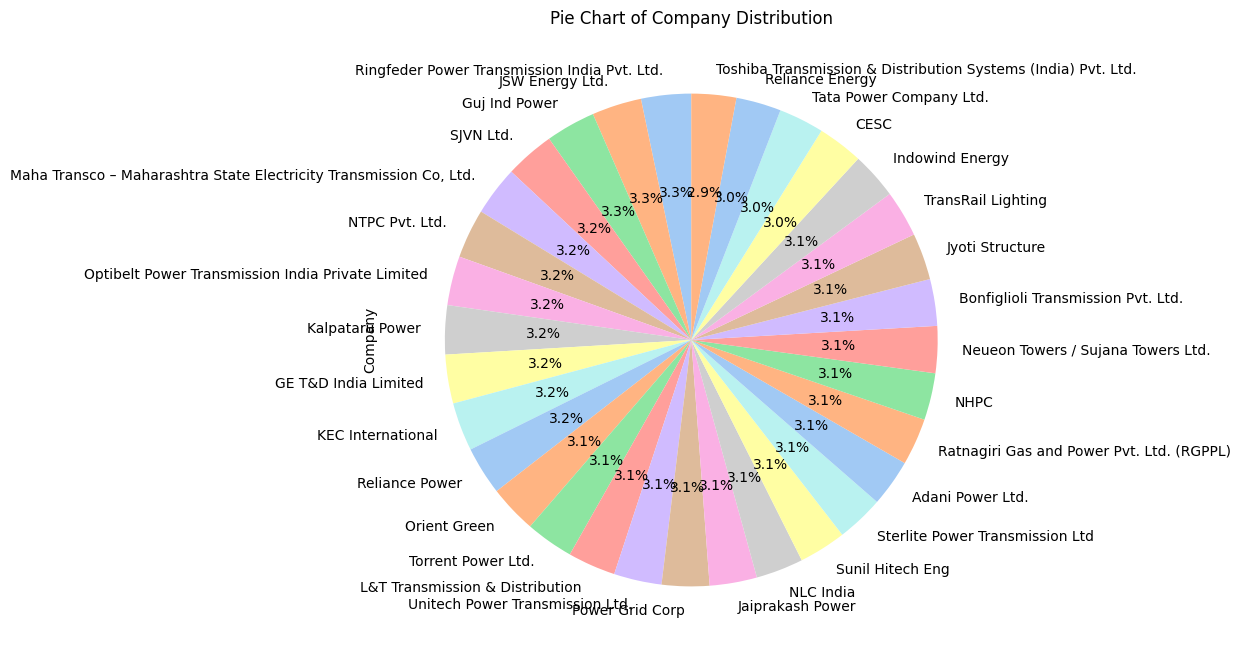

In [ ]:
plt.figure(figsize=(8, 8))
df['Company'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Pie Chart of Company Distribution')
plt.show()

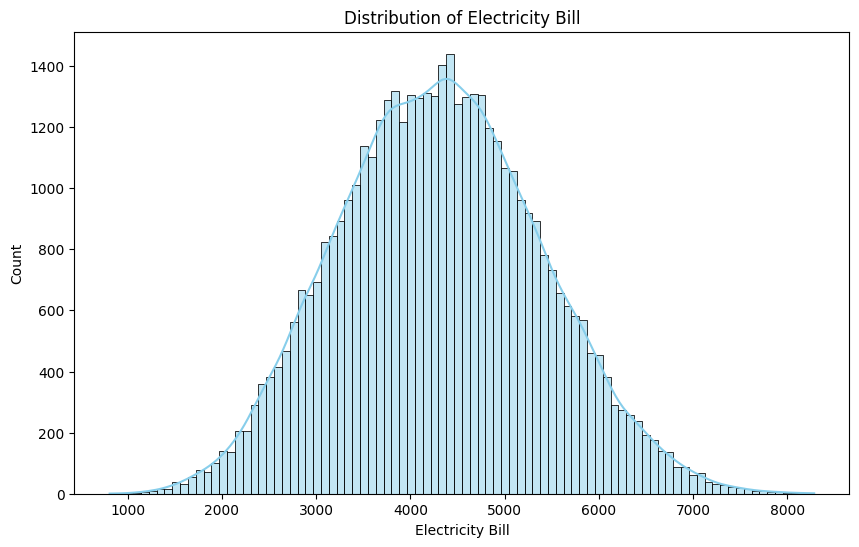

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ElectricityBill'], kde=True, color='skyblue')
plt.title('Distribution of Electricity Bill')
plt.xlabel('Electricity Bill')
plt.show()

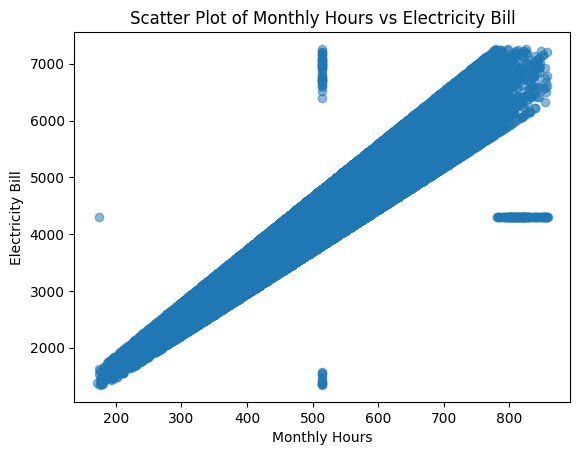

In [ ]:
#Monthly hours vs Electricity Bill
plt.scatter(df['MonthlyHours'], df['ElectricityBill'], alpha=0.5)
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.title('Scatter Plot of Monthly Hours vs Electricity Bill')
plt.show()

*   **The figure indicates a positive correlation between electricity usage and the corresponding electricity bill, suggesting that an increase in electricity consumption is associated with a higher billing amount.**

Text(0.5, 1.0, 'Citiwise Electricity bill usage')

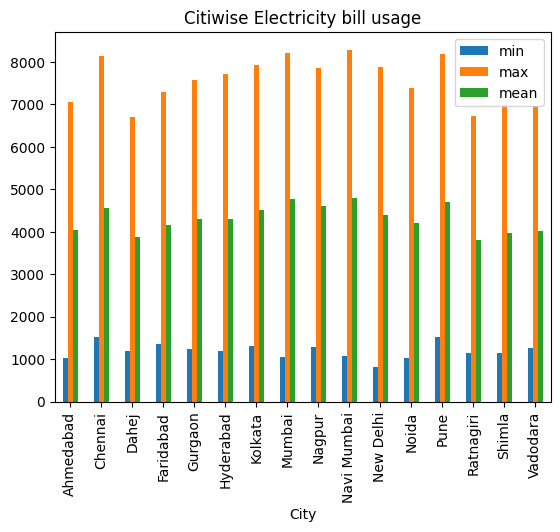

In [ ]:
bill_insights=df.groupby('City').ElectricityBill.agg(['min','max','mean']).plot(kind='bar')
plt.title('Citiwise Electricity bill usage')

*   **The average electricity bill usage varies significantly between cities. Navi Mumbai has the highest average electricity bill usage at around 8,000 rupees, while Faridabad has the lowest at around 1,000 rupees.**

*   **Climate: Cities with hotter climates may use more electricity for air conditioning.**

*   **Cost of living: Cities with a higher cost of living may have higher electricity rates.**

*   **Business vs residential usage: Cities with a larger commercial sector may have higher overall electricity usage.**

<ipython-input-57-7d53ee4dbf0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='MonthlyHours', data=df, palette='pastel')


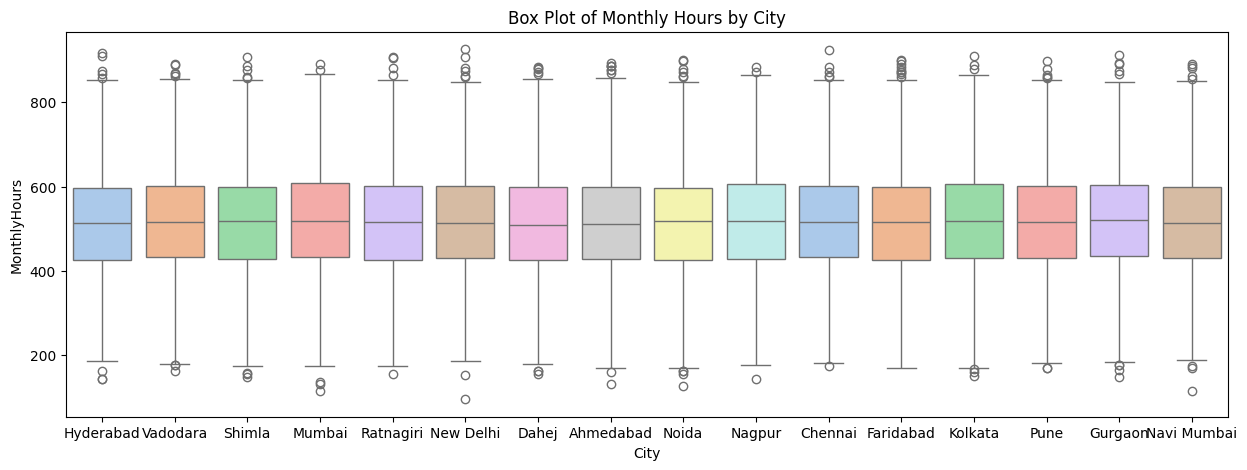

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='City', y='MonthlyHours', data=df, palette='pastel')
plt.title('Box Plot of Monthly Hours by City')
plt.show()

*   **The city of Hyderabad has the highest median monthly hours, at around 600 hours.**

*   **The city of Noida has the lowest median monthly hours, at around 200 hours.**

*   **There is a significant variation in monthly hours between cities. For example, the interquartile range for Hyderabad is much larger than the interquartile range for Noida. This means that the distribution of monthly hours is more spread out in Hyderabad.**

*   **There are some outliers in the data. For example, there is one city with a monthly hour value that is much higher than the rest of the data.**

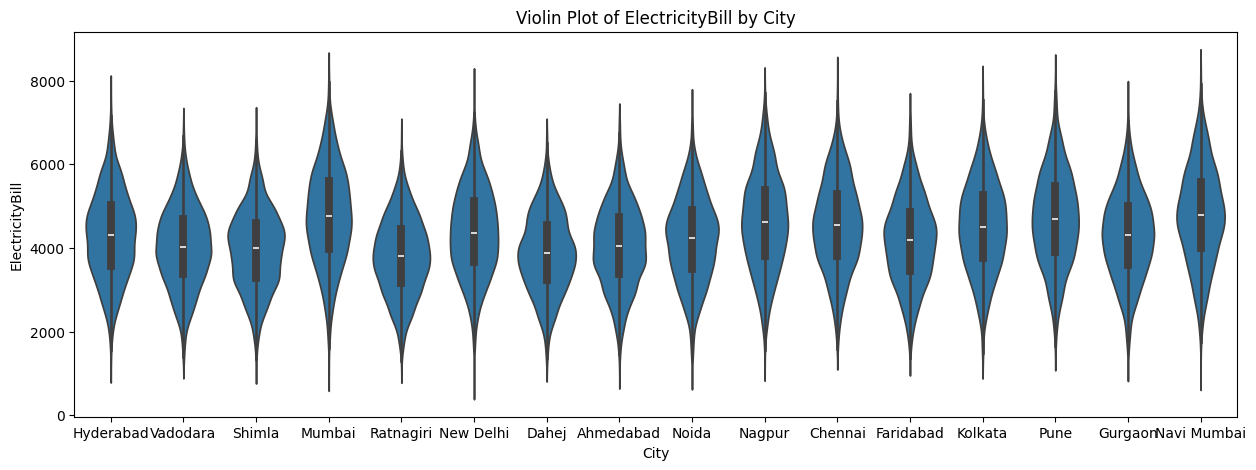

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(x='City', y='ElectricityBill', data=df)
plt.title('Violin Plot of ElectricityBill by City')
plt.show()



*   **The city of Navi Mumbai has the highest median electricity bill, at around 8,000 rupees, while Faridabad has the lowest at around 1,000 rupees.**

*   **There is a significant variation in electricity bill amounts between cities. The violin plots for some cities, such as Hyderabad and Chennai, are wider than the violin plots for other cities, such as Noida and Vadodara. This indicates that there is more variation in electricity bill amounts in Hyderabad and Chennai.**

*   **There are some outliers in the data. For example, there is a data point for Navi Mumbai that is much higher than the rest of the data for that city.**

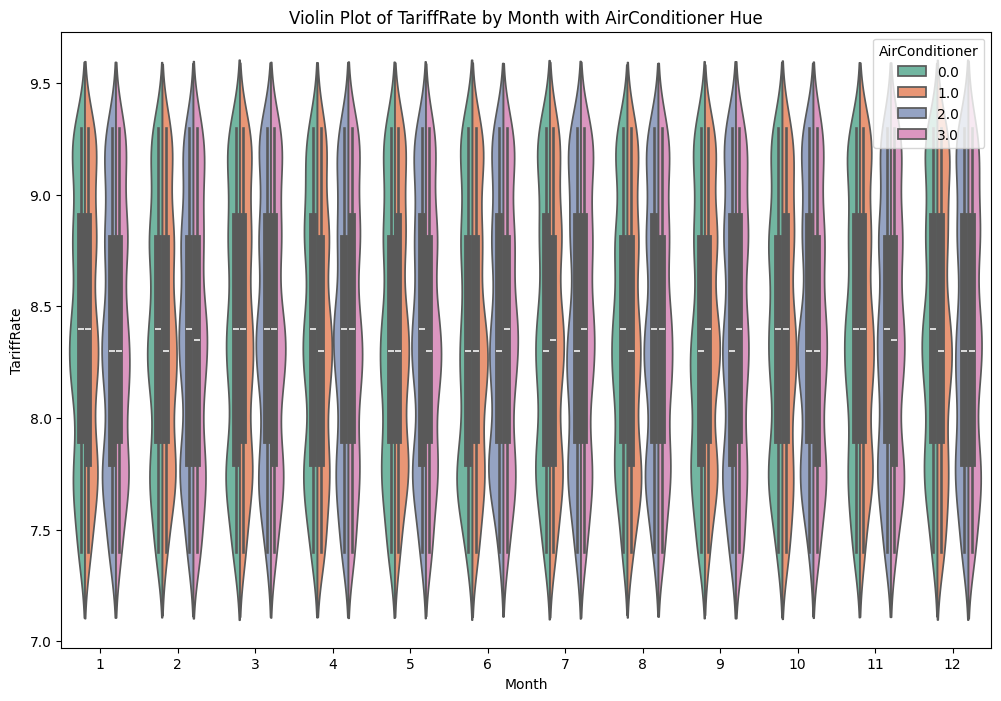

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Month', y='TariffRate', data=df, hue='AirConditioner', split=True, palette='Set2')
plt.title('Violin Plot of TariffRate by Month with AirConditioner Hue')
plt.show()

*   **the violin plot with the hue coloring suggests a possible link between TariffRate and Air Conditioner usage, but more data or context would be needed to draw a definitive conclusion.**

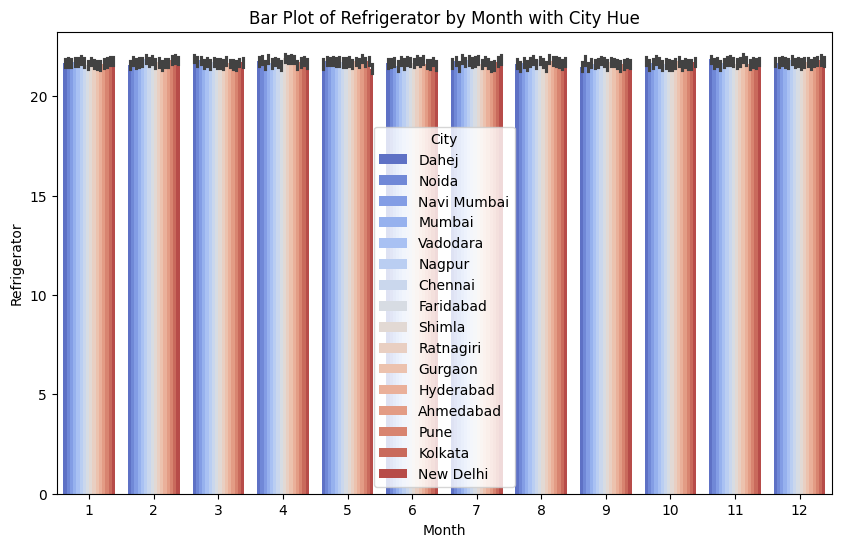

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Refrigerator', data=df, hue='City', palette='coolwarm')
plt.title('Bar Plot of Refrigerator by Month with City Hue')
plt.show()

*   **The number of refrigerators sold varies throughout the year. It appears that there might be a peak in refrigerator sales during the summer months (around month 5-8) based on the heights of the bars in those months.**

*   **There are variations in refrigerator sales across different cities. For example, the city colored blue appears to have consistently higher refrigerator sales throughout the year compared to other cities.**

<Figure size 1000x800 with 0 Axes>

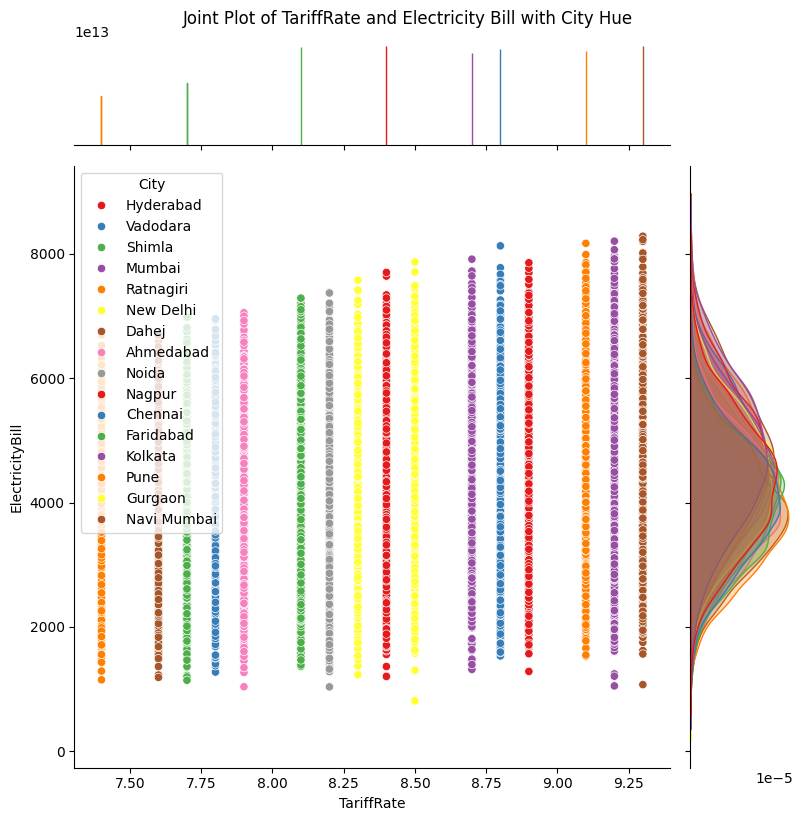

In [ ]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='TariffRate', y='ElectricityBill', data=df, kind='scatter', hue='City', height=8, palette='Set1')
plt.suptitle('Joint Plot of TariffRate and Electricity Bill with City Hue', y=1.02)
plt.show()

*   **There is a positive correlation between tariff rate and electricity bill. This means that cities with higher tariff rates also tend to have higher electricity bills.**

*   **There is a significant amount of variation in both tariff rate and electricity bill across the different cities. For example, the city colored green has a much higher tariff rate and electricity bill than the city colored blue.**

*   **Climate: Cities with hotter climates may use more electricity for air conditioning, which could lead to higher electricity bills.**

*   **Cost of living: Cities with a higher cost of living may have higher electricity rates.**

*   **Business vs residential usage: Cities with a larger commercial sector may have higher overall electricity usage.**

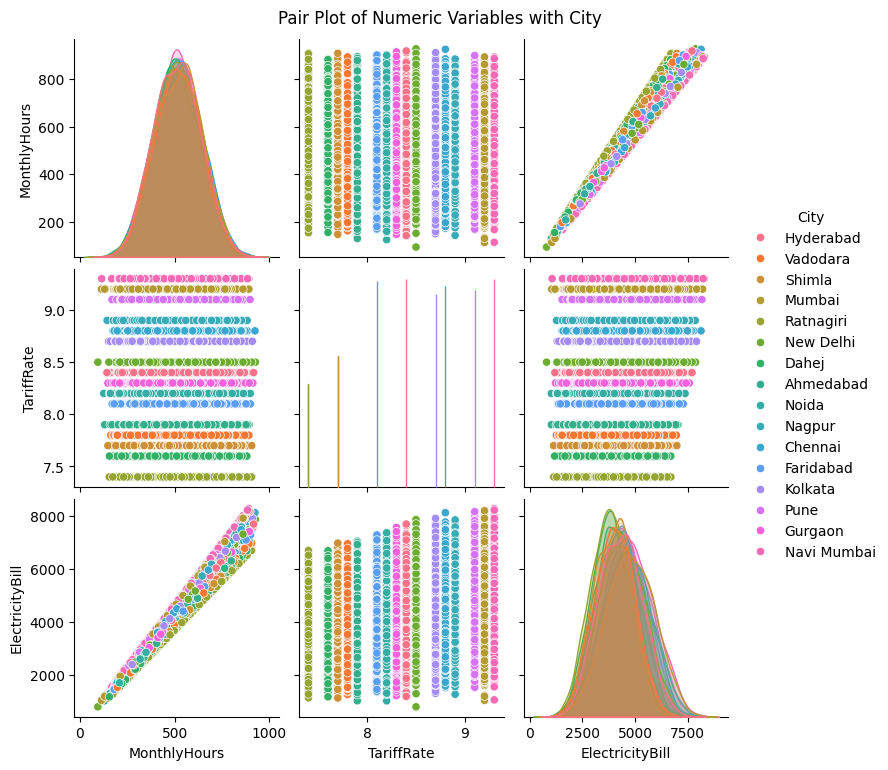

In [ ]:
selected_numeric_cols = ['MonthlyHours', 'TariffRate', 'ElectricityBill']
sns.pairplot(df, vars=selected_numeric_cols, hue='City', palette='husl')
plt.suptitle('Pair Plot of Numeric Variables with City', y=1.02)
plt.show()



*   **There appears to be a positive correlation between monthly hours and electricity bill. This means that cities that use electricity for more hours tend to have higher electricity bills.**

*   **There appears to be a positive correlation between tariff rate and electricity bill. This means that cities with higher tariff rates also tend to have higher electricity bills.**

*   **There does not appear to be a strong correlation between monthly hours and tariff rate.**

*   **Climate: Cities with hotter climates may use more electricity for air conditioning, which could lead to higher electricity bills.**

*   **Cost of living: Cities with a higher cost of living may have higher electricity rates.**

*   **Business vs residential usage: Cities with a larger commercial sector may have higher overall electricity usage.**




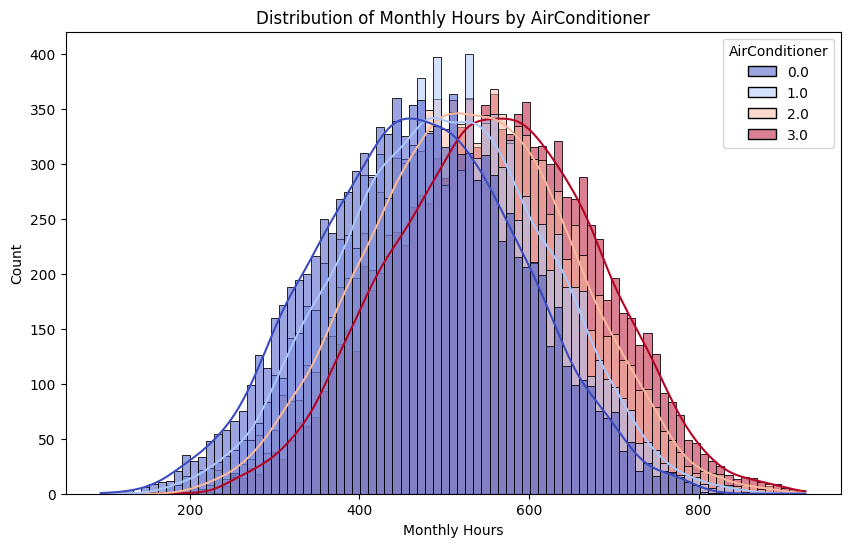

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='MonthlyHours', hue='AirConditioner', kde=True, palette='coolwarm')
plt.title('Distribution of Monthly Hours by AirConditioner')
plt.xlabel('Monthly Hours')
plt.show()

*   **There is a significant variation in electricity usage across different cities and months. For example, some cities have consistently high electricity usage throughout the year (dark colors across all months for a particular city), while others have lower and potentially seasonal variations (lighter colors throughout the year with darker colors in some months for a particular city).**

*   **Some cities appear to have peak electricity usage during the summer months (around May to August). This could be due to increased use of air conditioning in hotter weather.**

*   **Climate: Cities with hotter climates may use more electricity for air conditioning, which could lead to higher electricity usage in the summer months.**

*   **Cost of living: Cities with a higher cost of living may have higher electricity rates.**

*   **Business vs residential usage: Cities with a larger commercial sector may have higher overall electricity usage.**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


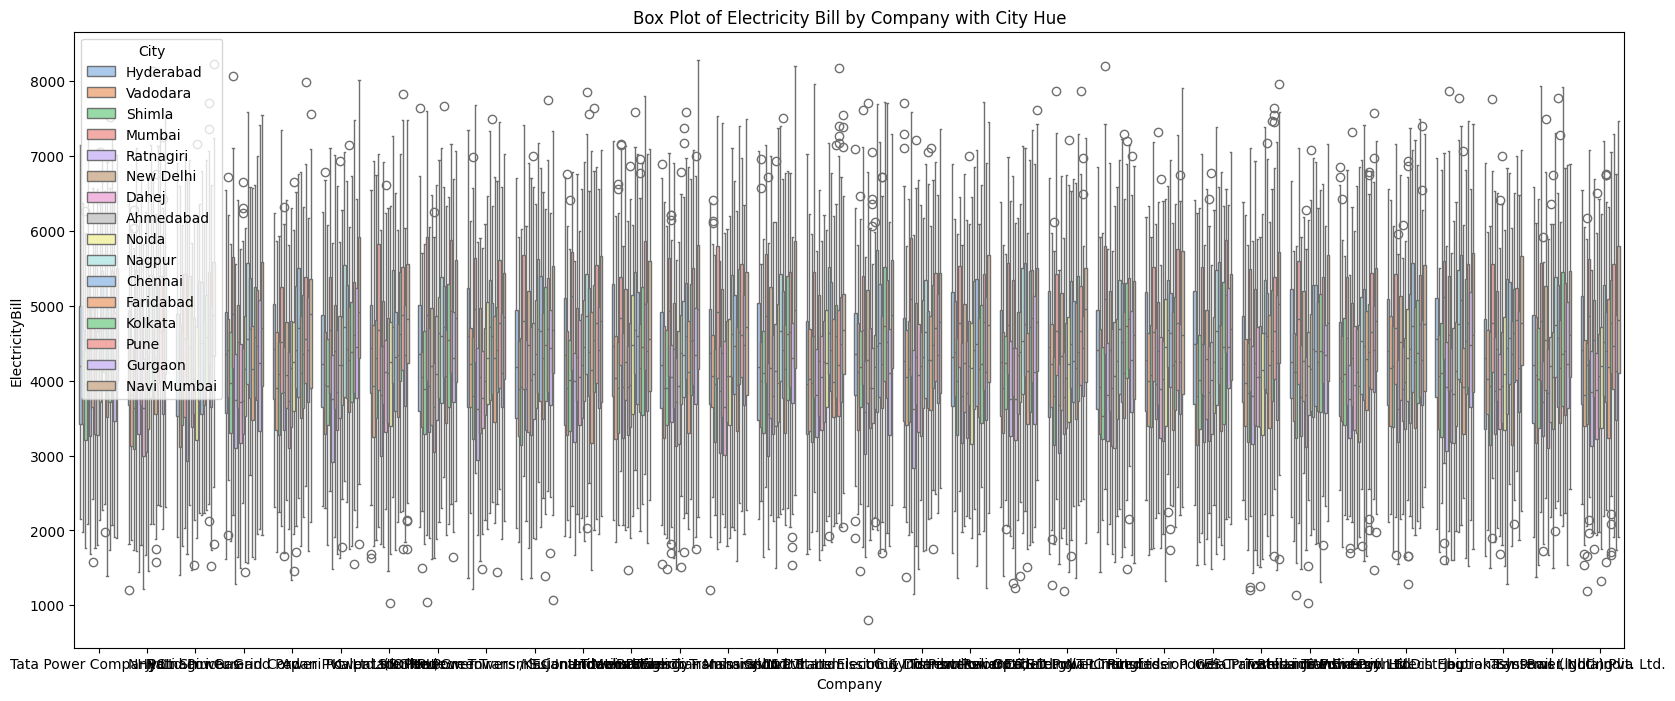

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Company', y='ElectricityBill', data=df, hue='City', palette='pastel')
plt.title('Box Plot of Electricity Bill by Company with City Hue')
plt.show()

*   **There is a significant variation in the distribution of electricity bills between the different companies. For example, the box for Tata Power appears to have a higher median and a larger interquartile range than the boxes for the other companies. This suggests that Tata Power customers may have higher electricity bills with more variation in their bills compared to customers of the other companies.**

*   **It is difficult to draw conclusions about the city with the highest or lowest electricity bills because the legend for city hue is missing.**

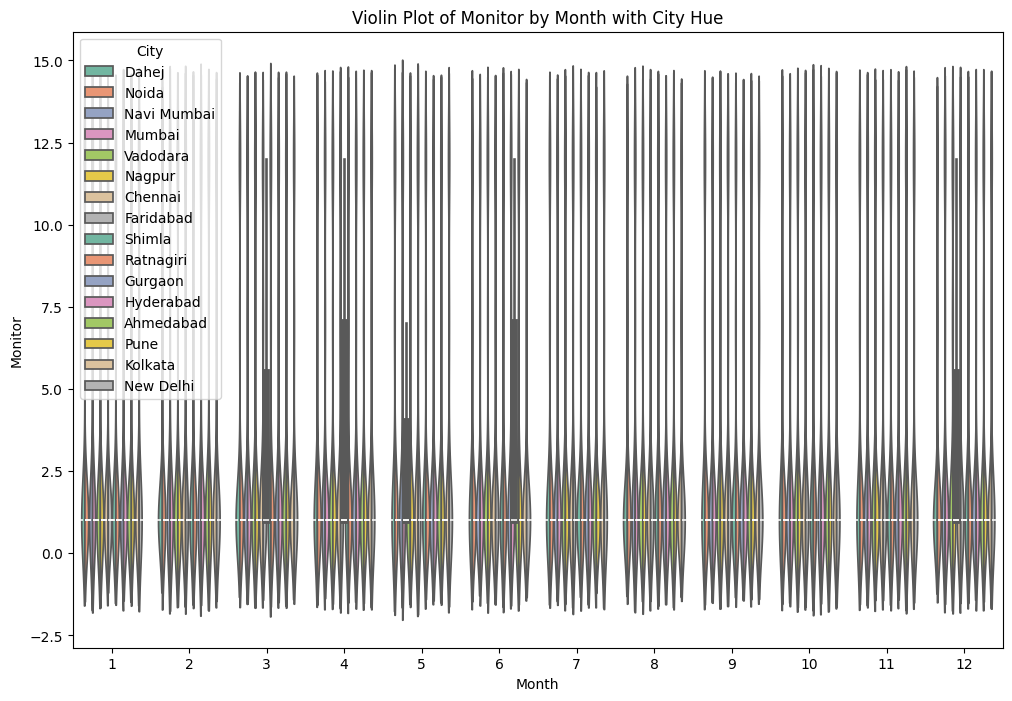

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Month', y='Monitor', data=df, hue='City', split=True, palette='Set2')
plt.title('Violin Plot of Monitor by Month with City Hue')
plt.show()

*   **The plot might be showing that the median monitor usage is higher in cities with a certain hue.**

*   **It’s also possible that there is no relationship between monitor usage and city, and the color is simply being used to distinguish between different datasets.**

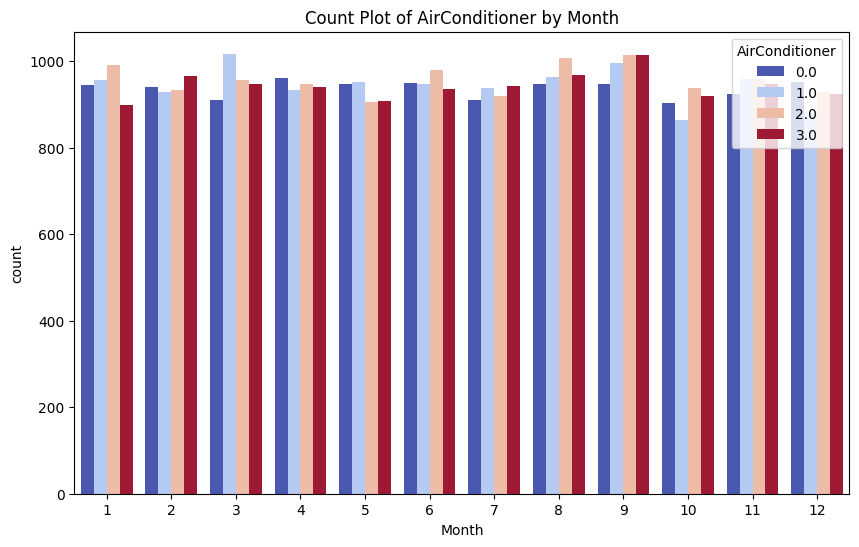

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='AirConditioner', data=df, palette='coolwarm')
plt.title('Count Plot of AirConditioner by Month')
plt.show()

*   **There is a positive correlation between educational attainment and employment rate. In other words, Canadians with higher levels of education are more likely to be employed.**

*   **The employment rate for Canadians with "Tertiary education (type A and advanced research)" is 89.1%, the highest rate in the chart.**

*   **The employment rate for Canadians with "Below upper secondary" education is 47.9%, the lowest rate in the chart.**

*   **The data is from 2011, so it may not reflect current employment trends in Canada.**

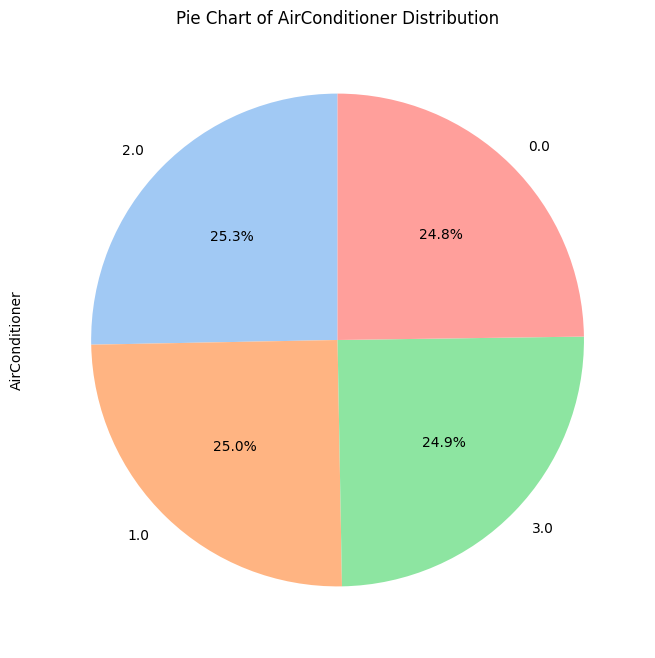

In [ ]:
plt.figure(figsize=(8, 8))
df['AirConditioner'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Pie Chart of AirConditioner Distribution')
plt.show()

*   **Cost: Window/wall and portable air conditioners may be more affordable than central and ductless split air conditioners.**

*   **Housing type: Window/wall and portable air conditioners may be more suitable for certain types of housing, such as apartments or older homes that do not have ductwork.**

*   **Climate: Portable air conditioners may be more common in areas with mild climates where a whole-house air conditioning system is not necessary.**

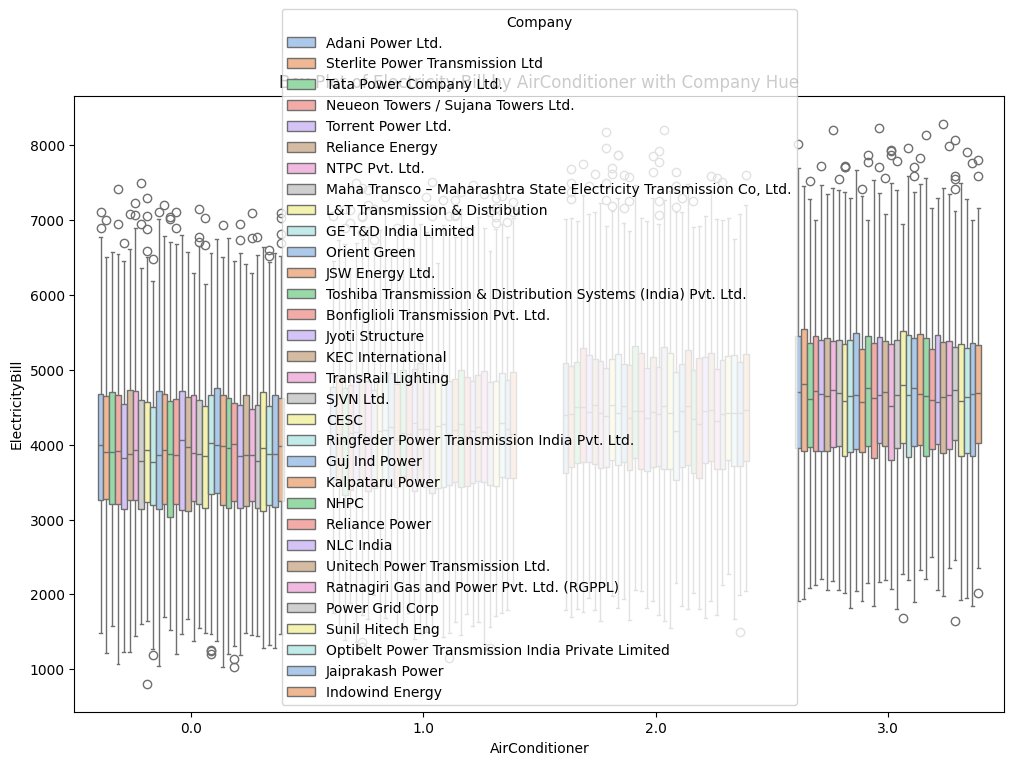

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='AirConditioner', y='ElectricityBill', data=df, hue='Company', palette='pastel')
plt.title('Box Plot of Electricity Bill by AirConditioner with Company Hue')
plt.show()

*   **The spread of the data points around the regression line indicates that there is variability in electricity bills even for customers with the same tariff rate. There could be other factors that influence electricity bills, such as the amount of electricity used.**

*  **The linear regression line only shows a general trend, and it may not perfectly fit all the data points.**

<ipython-input-81-514102b2cf58>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


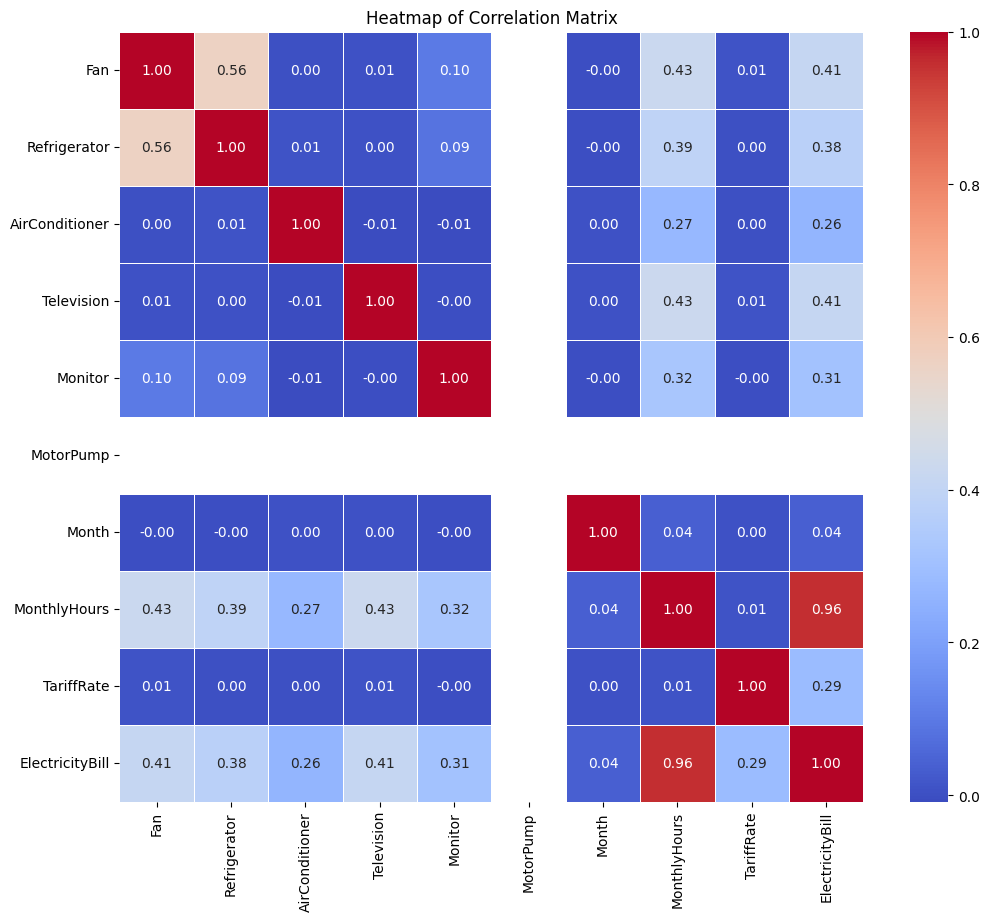

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

##**Identifying and removing outliers**

In [ ]:
numeric_columns=['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'MonthlyHours', 'TariffRate',
       'ElectricityBill']
detec_outlier_column=df[numeric_columns]

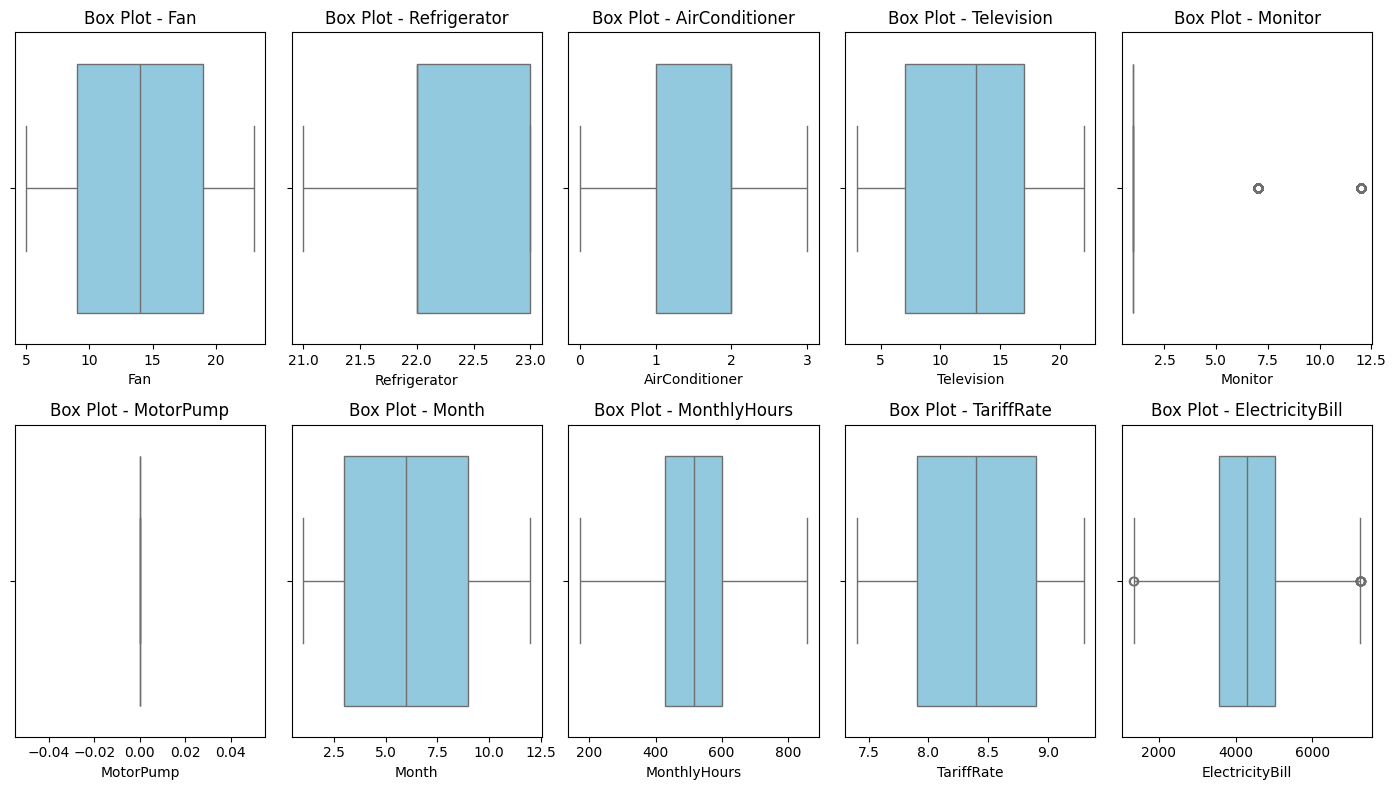

In [ ]:
plt.figure(figsize=(14, 8))
# Box plot for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot - {col}')
plt.tight_layout()
plt.show()

In [ ]:
outlier_column=['Refrigerator','MonthlyHours','ElectricityBill']
print(outlier_column)

['Refrigerator', 'MonthlyHours', 'ElectricityBill']


In [ ]:
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1
IQR

Refrigerator          1.0
MonthlyHours        172.0
ElectricityBill    1470.2
dtype: float64

In [ ]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 56 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Fan                                                                         45345 non-null  int64  
 1   Refrigerator                                                                45345 non-null  float64
 2   AirConditioner                                                              45345 non-null  float64
 3   Television                                                                  45345 non-null  float64
 4   Monitor                                                                     45345 non-null  float64
 5   MotorPump                                                                   45345 non-null  int64  
 6   Month                                         

In [ ]:
for column in numeric_columns:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  float64
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 4.2+ MB


#Feature Engineer

In [ ]:
# One-hot encoding for 'City' and 'Company' columns
df = pd.get_dummies(df, columns=['City', 'Company'], drop_first=True)

In [ ]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,16,23.0,2.0,6.0,1.0,0,10,384.0,8.4,3225.6,...,0,0,0,0,0,1,0,0,0,0
1,19,22.0,2.0,3.0,1.0,0,5,488.0,7.8,3806.4,...,0,0,0,0,0,0,0,0,0,0
2,7,22.0,2.0,6.0,7.0,0,7,416.0,7.7,3203.2,...,0,0,0,0,0,0,0,0,0,0
3,7,22.0,3.0,21.0,1.0,0,6,475.0,9.2,4370.0,...,0,0,0,0,0,0,0,0,0,0
4,11,23.0,2.0,11.0,1.0,0,2,457.0,9.2,4204.4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Assuming 'ElectricityBill' is the target variable
X = df_encoded.drop('ElectricityBill', axis=1)
y = df_encoded['ElectricityBill']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(f"the train shape {X_train.shape} and {y_train.shape}")
print(f"the train shape {X_test.shape} and {y_test.shape}")

the train shape (34008, 55) and (34008,)
the train shape (11337, 55) and (11337,)


In [ ]:
#Creat an object of Standard Scaler
scaler = StandardScaler()
# standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Model Implementation:

##**Linear Regression**

In [ ]:
#Multiple linear regression is fitted to the training set.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Evaluate the coefficient
regressor.coef_

array([ 8.83888778e+00,  2.11917548e+00,  4.39563647e+00,  7.57816804e+00,
        1.05646706e+00, -1.17878389e+12,  4.61668680e-01,  9.88777708e+02,
       -7.01674437e+13,  2.65932982e+13, -8.83550648e+12,  5.94030610e+12,
        1.18012656e+13,  1.48060807e+13,  2.31600897e+13,  3.83708191e+13,
        2.93030364e+13,  4.18574392e+13,  1.76826033e+13,  8.71461156e+12,
        3.49291841e+13, -1.48092784e+13, -5.83198442e+12, -2.89501121e+12,
       -1.59057928e+00, -1.25154771e+00, -2.70263471e+00, -2.10642694e+00,
       -1.28779679e+00, -2.41058581e+00, -3.47294866e-01, -1.52671619e+00,
       -1.34213278e+00, -1.92251562e+00, -1.70329449e+00, -3.34136328e+00,
       -6.93456740e-01, -1.51428354e+00, -2.72975124e+00, -1.55274869e+00,
       -1.33843928e+00, -1.13054059e+00, -1.13167265e+00, -2.11488267e+00,
       -1.19606113e+00, -4.92796768e-01, -4.09313700e+00, -1.20322711e+00,
       -2.86408136e+00, -2.03270455e+00, -4.87258501e-01, -3.47461962e+00,
       -8.30001190e-01, -

In [ ]:
#checking the score
print("The train score is :", round(regressor.score(X_train, y_train),2))
print("The test score is :", round(regressor.score(X_test, y_test),2))

The train score is : 0.97
The test score is : -9.314734894624109e+17


In [ ]:
y_pred_train_linear=regressor.predict(X_train)
y_pred_test_linear=regressor.predict(X_test)

In [ ]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)
Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 32849.991515957256
RMSE : 181.24566619910462
MAE : 61.31052333818832
R2 : 0.9706575987767495
Adjusted R2 : 0.9705145412404248
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 1.0300641293744293e+24
RMSE : 1014920750292.5681
MAE : 765270606732.0657
R2 : -9.314734894624109e+17
Adjusted R2 : -9.360148458953894e+17


*   The evaluation metrics indicate that the linear regression model is experiencing severe overfitting.



##**SVM**

In [ ]:
# Create an SVM regressor with a radial basis function (RBF) kernel
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [ ]:
# Fit the SVM regressor to the training data
svm_regressor.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions on the training set
y_pred_train_svm = svm_regressor.predict(X_train)

In [ ]:
# Make predictions on the test set
y_pred_test_svm = svm_regressor.predict(X_test)

In [ ]:
# Evaluate the performance on training data
print('Evaluation metrics for training data\n')
MSE_svm_train = mean_squared_error(y_train, y_pred_train_svm)
print("MSE:", MSE_svm_train)

RMSE_svm_train = np.sqrt(MSE_svm_train)
print("RMSE:", RMSE_svm_train)

MAE_svm_train = mean_absolute_error(y_train, y_pred_train_svm)
print("MAE:", MAE_svm_train)

R2_svm_train = r2_score(y_train, y_pred_train_svm)
print("R2:", R2_svm_train)

Adjusted_R2_svm_train = (1 - (1 - r2_score(y_train, y_pred_train_svm)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted R2:", Adjusted_R2_svm_train)

print('--' * 80)

# Evaluate the performance on testing data
print('Evaluation metrics for testing data\n')
MSE_svm_test = mean_squared_error(y_test, y_pred_test_svm)
print("MSE:", MSE_svm_test)

RMSE_svm_test = np.sqrt(MSE_svm_test)
print("RMSE:", RMSE_svm_test)

MAE_svm_test = mean_absolute_error(y_test, y_pred_test_svm)
print("MAE:", MAE_svm_test)

R2_svm_test = r2_score(y_test, y_pred_test_svm)
print("R2:", R2_svm_test)

Adjusted_R2_svm_test = (1 - (1 - r2_score(y_test, y_pred_test_svm)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))
print("Adjusted R2:", Adjusted_R2_svm_test)

Evaluation metrics for training data

MSE: 719698.4403291843
RMSE: 848.3504230736166
MAE: 684.4901523191708
R2: 0.35714807154125605
Adjusted R2: 0.356106693829627
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE: 714838.7686437467
RMSE: 845.4813827895601
MAE: 683.9319737095828
R2: 0.35358067207331567
Adjusted R2: 0.350429084178983


*   The evaluation metrics for both the training and testing data suggest that the SVM regression model is underfitting.

##**Lasso**

In [ ]:
#Training the ridge regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
lasso_model_grid = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
                                   0.01]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in lasso regression is: {lasso_model_grid.best_params_}')
print(f'Using {lasso_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in lasso regression is: {'alpha': 1.0}
Using {'alpha': 1.0} as the value of aplha gives us a negative mean squared error of: -32945.26596652246


In [ ]:
#Fit Model
lasso_model=Lasso(alpha=0.02).fit(X_train,y_train)

In [ ]:
#Predict train & test values
y_pred_train_lasso=lasso_model.predict(X_train)
y_pred_test_lasso=lasso_model.predict(X_test)

In [ ]:
#checking the score
print("The train score is :", round(lasso_model.score(X_train, y_train),2))
print("The test score is :", round(lasso_model.score(X_test, y_test),2))

The train score is : 0.97
The test score is : 0.97


In [ ]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_lasso_train= mean_squared_error(y_train, y_pred_train_lasso)
print("MSE :",MSE_lasso_train)

#calculate RMSE
RMSE_lasso_train=np.sqrt(MSE_lasso_train)
print("RMSE :",RMSE_lasso_train)

#calculate MAE
MAE_lasso_train= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso_train)

#calculate r2 and adjusted r2
R2_lasso_train= r2_score(y_train,y_pred_train_lasso)
print("R2 :",R2_lasso_train)
Adjusted_R2_lasso_train = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_lasso_test= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso_test)

#calculate RMSE
RMSE_lasso_test=np.sqrt(MSE_lasso_test)
print("RMSE :",RMSE_lasso_test)

#calculate MAE
MAE_lasso_test= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso_test)

#calculate r2 and adjusted r2
R2_lasso_test= r2_score(y_test, y_pred_test_lasso)
print("R2 :",R2_lasso_test)
Adjusted_R2_lasso_test = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lasso_test)

Evaluation metrics for training data

MSE : 32849.41658448886
RMSE : 181.24408013639746
MAE : 61.24929090782816
R2 : 0.9706581123193425
Adjusted R2 : 0.9705150572867712
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 28464.685070362462
RMSE : 168.7148039454821
MAE : 60.63039770429866
R2 : 0.9742597584239329
Adjusted R2 : 0.9741342630523626


*   These metrics suggest that the model performs well on both the training and testing datasets. The low values of MSE, RMSE, and MAE indicate that the predicted values are close to the actual values. Additionally, high R-squared and Adjusted R-squared values indicate a good fit of the model to the data, capturing a high percentage of the variance.

##**Ridge**

In [ ]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
ridge_model_grid = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
                                   0.01]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in ridge regression is: {ridge_model_grid.best_params_}')
print(f'Using {ridge_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in ridge regression is: {'alpha': 1.0}
Using {'alpha': 1.0} as the value of aplha gives us a negative mean squared error of: -32984.280584405526


In [ ]:
#Fit Model
ridge_model=Ridge(alpha=1.0).fit(X_train,y_train)

In [ ]:
#Predict train & test values
y_pred_train_ridge=ridge_model.predict(X_train)
y_pred_test_ridge=ridge_model.predict(X_test)

In [ ]:
#checking the score
print("The train score is :", round(ridge_model.score(X_train, y_train),2))
print("The test score is :", round(ridge_model.score(X_test, y_test),2))

The train score is : 0.97
The test score is : 0.97


In [ ]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_ridge_train= mean_squared_error(y_train, y_pred_train_ridge)
print("MSE :",MSE_ridge_train)

#calculate RMSE
RMSE_ridge_train=np.sqrt(MSE_ridge_train)
print("RMSE :",RMSE_ridge_train)

#calculate MAE
MAE_ridge_train= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge_train)

#calculate r2 and adjusted r2
R2_ridge_train= r2_score(y_train,y_pred_train_ridge)
print("R2 :",R2_ridge_train)
Adjusted_R2_ridge_train = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_ridge_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_ridge_test= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge_test)

#calculate RMSE
RMSE_ridge_test=np.sqrt(MSE_ridge_test)
print("RMSE :",RMSE_ridge_test)

#calculate MAE
MAE_ridge_test= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge_test)

#calculate r2 and adjusted r2
R2_ridge_test= r2_score(y_test, y_pred_test_ridge)
print("R2 :",R2_ridge_test)
Adjusted_R2_ridge_test = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_ridge_test)

Evaluation metrics for training data

MSE : 32849.11828499975
RMSE : 181.24325721250915
MAE : 61.28579961626375
R2 : 0.970658378767609
Adjusted R2 : 0.9705153250340941
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 28482.757106648336
RMSE : 168.76835339200397
MAE : 60.60462043684542
R2 : 0.9742434161184191
Adjusted R2 : 0.9741178410706852


*   These metrics indicate that the model has successfully generalized to the testing dataset. The low values of MSE, RMSE, and MAE for both training and testing data suggest that the predicted values closely match the actual values. The high R-squared and Adjusted R-squared values (close to 1) indicate that a significant proportion of the variance in the dependent variable is explained by the independent variables.

##**ElasticNet**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_model_grid = GridSearchCV(elastic, parameters,scoring='neg_mean_squared_error', cv=5)
elastic_model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02,
                                   0.01],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for elastcinet regression
print(f'Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {elastic_model_grid.best_params_}')
print(f'Using {elastic_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {elastic_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {'alpha': 0.01, 'l1_ratio': 0.5}
Using {'alpha': 0.01, 'l1_ratio': 0.5} as the value of aplha gives us a negative mean squared error of: -33032.35415953408


In [ ]:
#Fitting the elastic regression model
elasticnet_model=ElasticNet(alpha=0.01,l1_ratio=0.5).fit(X_train,y_train)

In [ ]:
#Predict train & test values
y_pred_train_elastic=elasticnet_model.predict(X_train)
y_pred_test_elastic=elasticnet_model.predict(X_test)

In [ ]:
#checking the score
print("The train score is :", round(elasticnet_model.score(X_train, y_train),2))
print("The test score is :", round(elasticnet_model.score(X_test, y_test),2))

The train score is : 0.97
The test score is : 0.97


In [ ]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_elastic_train= mean_squared_error(y_train, y_pred_train_elastic)
print("MSE :",MSE_elastic_train)

#calculate RMSE
RMSE_elastic_train=np.sqrt(MSE_elastic_train)
print("RMSE :",RMSE_elastic_train)

#calculate MAE
MAE_elastic_train= mean_absolute_error(y_train, y_pred_train_elastic)
print("MAE :",MAE_elastic_train)

#calculate r2 and adjusted r2
R2_elastic_train= r2_score(y_train,y_pred_train_elastic)
print("R2 :",R2_elastic_train)
Adjusted_R2_elastic_train = (1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_elastic_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_elastic_test= mean_squared_error(y_test, y_pred_test_elastic)
print("MSE :",MSE_elastic_test)

#calculate RMSE
RMSE_elastic_test=np.sqrt(MSE_elastic_test)
print("RMSE :",RMSE_elastic_test)

#calculate MAE
MAE_elastic_test= mean_absolute_error(y_test, y_pred_test_elastic)
print("MAE :",MAE_elastic_test)

#calculate r2 and adjusted r2
R2_elastic_test= r2_score(y_test, y_pred_test_elastic)
print("R2 :",R2_elastic_test)
Adjusted_R2_elastic_test = (1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_elastic_test)

Evaluation metrics for training data

MSE : 32900.14228384442
RMSE : 181.3839636898599
MAE : 63.206008893582606
R2 : 0.9706128029066415
Adjusted R2 : 0.9704695269700991
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 28583.972748103177
RMSE : 169.06795304877616
MAE : 62.55230713552891
R2 : 0.9741518881406501
Adjusted R2 : 0.9740258668524431


*   These metrics suggest that the model is able to generalize well to unseen data, as the performance on the testing dataset is comparable to the training dataset. The values of MSE, RMSE, and MAE are reasonable, indicating that the predicted values are relatively close to the actual values. The R-squared and Adjusted R-squared values are also high, suggesting that a significant portion of the variance in the dependent variable is explained by the independent variables.

##**Summary:**

The "Indian Household Electricity Consumption Dataset" provides valuable insights into predicting monthly electricity bills in Indian households. It encompasses data on monthly operational hours of various household appliances and demographic factors like the city of residence and electricity distribution company. The primary objective is to develop predictive models for estimating monthly electricity bills based on appliance usage patterns and demographic information.

Key findings from the dataset exploration include:
- Positive correlation between electricity usage and corresponding bills.
- Significant variations in average electricity bills among cities influenced by climate, cost of living, and business vs. residential usage.
- Appliance-specific usage patterns and potential correlations with tariff rates and demographic factors.
- Identification of outliers and variations in monthly hours and electricity bills.
- City-wise patterns and demographic influences on electricity consumption.
- Impact of distribution companies on electricity bills, revealing variations in median bills and interquartile ranges.

**Conclusions:**

1. **Predictive Modeling:** The dataset provides a robust foundation for developing predictive models to estimate monthly electricity bills accurately. Various machine learning algorithms like Lasso, Ridge, ElasticNet, etc., can be applied to model the relationship between appliance usage, demographic factors, and electricity bills.

2. **Feature Importance:** Further analysis can identify the most significant features impacting electricity bills, allowing utilities and consumers to focus on optimizing usage patterns and minimizing costs.

3. **Policy Implications:** Insights from the dataset can inform policy decisions related to electricity tariffs, energy management strategies, and infrastructure development. For instance, cities with higher electricity bills may require targeted interventions to improve energy efficiency and affordability.

4. **Consumer Behavior:** Understanding appliance-specific usage patterns and their correlations with demographic factors can provide valuable insights into consumer behavior and preferences. This knowledge can guide marketing strategies, product development, and demand-side management initiatives.

5. **Data-driven Decision Making:** By leveraging the rich information available in the dataset, utilities and policymakers can make informed decisions to enhance electricity service delivery, promote sustainability, and meet the evolving needs of consumers.

Overall, the "Indian Household Electricity Consumption Dataset" offers a comprehensive understanding of electricity consumption patterns in Indian households and holds immense potential for driving evidence-based interventions to optimize energy usage and improve the affordability and reliability of electricity services.